In [ ]:
import numpy as np
import pandas as pd
import random
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8


from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Regression Lab 3: Regularization

## Motivation behind regularization

Most, if not all real world data is noisy, i.e. there are outliers in the data which throw the model off during training. Let's look at a noisy sine wave as an example. We'll try to fit polynomials of various degree to the curve.

In [ ]:
np.random.seed(10)  

x = np.array([i*np.pi/180 for i in range(60,300,4)]).reshape((-1,1))
y = np.sin(x) + np.random.normal(0,0.15,x.shape)

In [ ]:
def poly_regression(x,y,deg,show=True):

  poly = PolynomialFeatures(degree=deg)

  x_ = poly.fit_transform(x)
  poly.fit(x_,y)

  m1 = LinearRegression()
  m1.fit(x_,y)
  y_pred = m1.predict(x_)

  
  if show:
    plt.plot(x,y_pred,color="red")
    plt.title("Visualization of actual data vs predicted outputs (polynomial regression deg={})".format(deg))
    plt.scatter(x,y,color="blue")
    plt.legend(["predicted polynomial","actual data points"])
    plt.show()

    print("\n Coefficients obtained\n")
    print(m1.coef_)
    print("\n")

  return y_pred

For now, let's not think about how we obtain these coefficients. We'll look into how they are obtained in a later module.

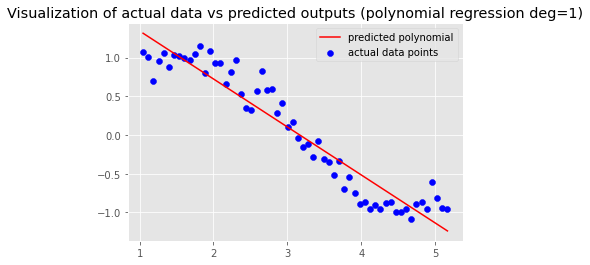


 Coefficients obtained

[[ 0.         -0.61957457]]




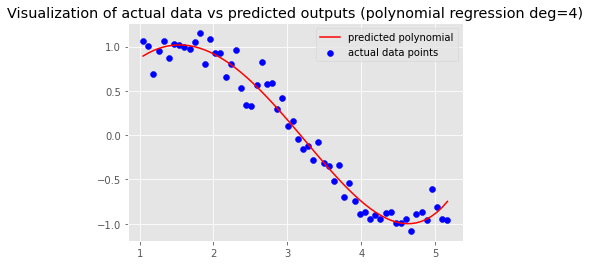


 Coefficients obtained

[[ 0.          1.68692165 -0.53175186 -0.03567846  0.01391921]]




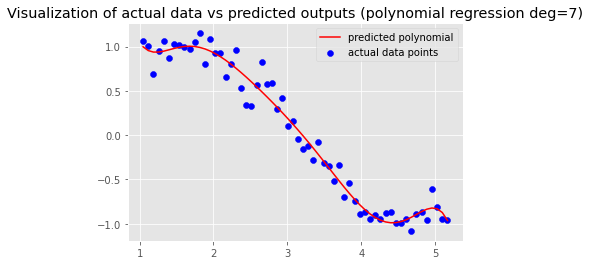


 Coefficients obtained

[[ 0.00000000e+00 -5.59523300e+01  6.89561793e+01 -4.46319059e+01
   1.65148424e+01 -3.52813549e+00  4.04509832e-01 -1.92268762e-02]]




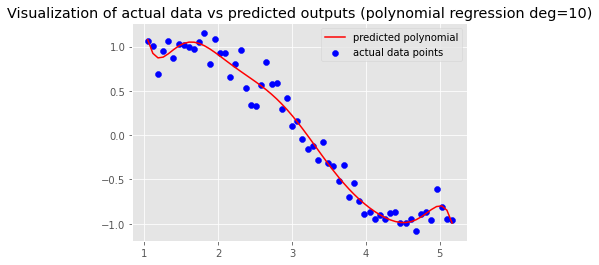


 Coefficients obtained

[[ 0.00000000e+00 -4.86124812e+02  7.26132188e+02 -5.95880098e+02
   2.93255129e+02 -8.74561572e+01  1.45461061e+01 -8.06062525e-01
  -1.38205866e-01  2.62232264e-02 -1.32095913e-03]]




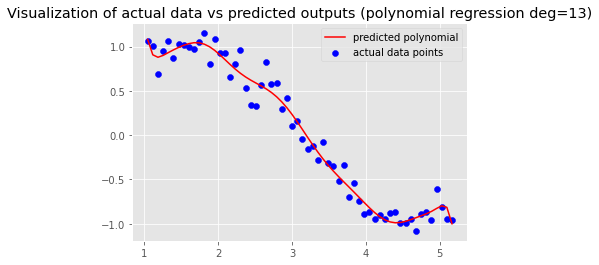


 Coefficients obtained

[[ 0.00000000e+00 -1.77942599e+04  4.45882359e+04 -6.66100409e+04
   6.61553398e+04 -4.61171897e+04  2.32177849e+04 -8.55126155e+03
   2.30570202e+03 -4.49925397e+02  6.18240901e+01 -5.67111742e+00
   3.11610280e-01 -7.75456391e-03]]




In [ ]:
for deg in range(1,14,3):
  y_pred = poly_regression(x,y,deg)

This is exactly the same issue as we had seen previously in lab 1! The higher degree polynomials **overfit** the training data, by trying to capture noise in it. Though the model may do well on this set, if we try to fit the learnt curve to another noisy sine wave, it would result in a lower accuracy. Luckily, there's a way around this.

**Q:** What trend do you observe with respect to the coefficient values as degree grows?

\

**A:** The magnitudes of the coefficients go up drastically with degree!

\

Now, why does that happen? Intuitively, we can think about what the polynomial is trying to fit here. In the above example, the polynomial is trying to fit to a noisy sine wave. To approximate the large oscillations we see, the coefficients need to have large magnitudes. We can also see that this only happens with higher degree polynomials, since lower degree polynomials cannot even approximate these oscillations.

## Ridge Regression

Ridge regression works by adding a term to the loss function which is proportional to the sum of the squared coefficients of the model.

$L_r = \sum_{i=1}^{N} (y - y_p) ^2 + \alpha |w|^2$,

where $\sum_{i=1}^{N} (y - y_p) ^2$ is the typical mean-squared error loss and $\alpha |w|^2$ is the regularization term, $w$ being the coefficient of the term. We can see that it penalizes the squared value of the coefficients.

In [ ]:
def ridge_regression(x,y,deg,alpha):

  poly = PolynomialFeatures(degree=deg)
  x_ = poly.fit_transform(x)
  
  r = Ridge(alpha,normalize=True)
  r.fit(x_,y)

  y_pred_ridge = r.predict(x_)

  plt.title("Ridge Regressed polynomial deg={}, alpha={}".format(deg,alpha))
  plt.scatter(x,y,color="blue")
  plt.plot(x,y_pred_ridge,color="red")
  plt.legend(["actual data","predicted data"])
  plt.show()

  print("\n Coefficients obtained\n")
  print(r.coef_)
  print("\n")

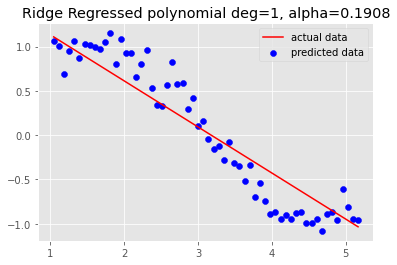


 Coefficients obtained

[[ 0.         -0.52030112]]




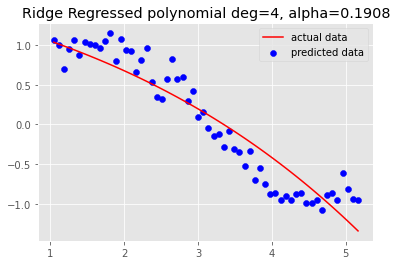


 Coefficients obtained

[[ 0.00000000e+00 -2.58022614e-01 -3.06542422e-02 -3.26452482e-03
  -1.22827132e-04]]




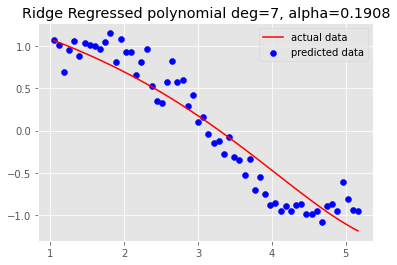


 Coefficients obtained

[[ 0.00000000e+00 -2.49962889e-01 -3.32238191e-02 -4.44132490e-03
  -4.74507640e-04 -1.75487401e-05  1.03568846e-05  4.47175753e-06]]




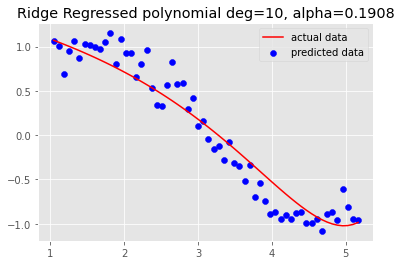


 Coefficients obtained

[[ 0.00000000e+00 -2.29408641e-01 -3.23577946e-02 -4.80081730e-03
  -6.50293746e-04 -7.24699525e-05 -4.25748466e-06  9.00209223e-07
   4.71216499e-07  1.41511617e-07  3.58110395e-08]]




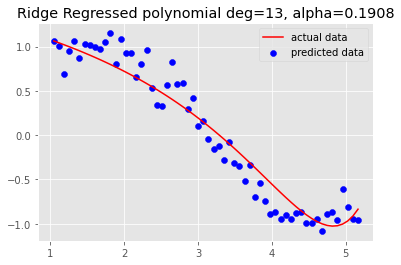


 Coefficients obtained

[[ 0.00000000e+00 -2.17327395e-01 -3.09365488e-02 -4.70684716e-03
  -6.75888906e-04 -8.72371643e-05 -9.17294017e-06 -4.63740129e-07
   1.26857573e-07  5.95070758e-08  1.70446336e-08  4.15540984e-09
   9.33965834e-10  1.99842776e-10]]




In [ ]:
alpha = 0.1908 #@param {type:"slider", min:0, max:1, step:0.0001}

for deg in range(1,14,3):
  ridge_regression(x,y,deg,alpha=alpha)

## Lasso Regression

Lasso regression is similar to ridge regression, except it penalizes the absolute value of the weights.

$L_l = \sum_{i=1}^{N} (y - y_p) ^2 + \alpha |w|$

In [ ]:
def lasso_regression(x,y,deg,alpha):

  poly = PolynomialFeatures(degree=deg)
  x_ = poly.fit_transform(x)
  
  l = Lasso(alpha,normalize=True)
  l.fit(x_,y)

  y_pred_lasso = l.predict(x_)

  plt.title("Lasso Regressed polynomial deg={}, alpha={}".format(deg,alpha))
  plt.scatter(x,y,color="blue")
  plt.plot(x,y_pred_lasso,color="red")
  plt.legend(["actual data","predicted data"])
  plt.show()

  print("\n Coefficients obtained\n")
  print(l.coef_)
  print("\n")

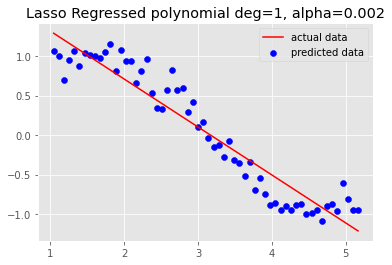


 Coefficients obtained

[ 0.         -0.60676107]




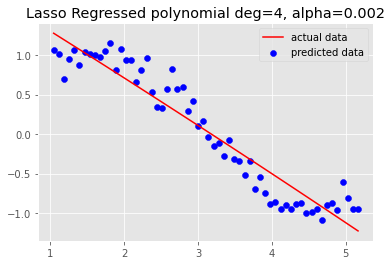


 Coefficients obtained

[ 0.        -0.5779558 -0.0046448 -0.         0.       ]




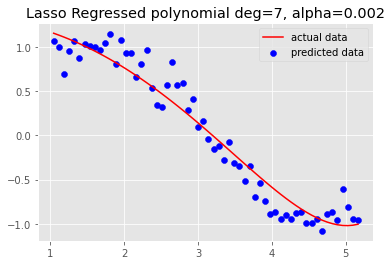


 Coefficients obtained

[ 0.00000000e+00 -4.20298161e-02 -1.20999306e-01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  1.12901130e-05]




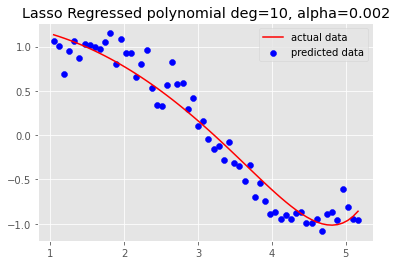


 Coefficients obtained

[ 0.00000000e+00 -0.00000000e+00 -1.23420451e-01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  8.61643410e-08]




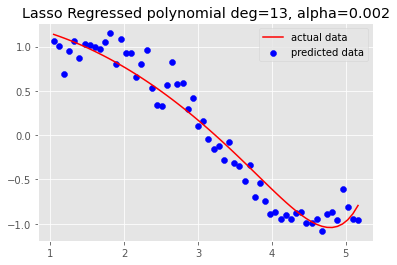


 Coefficients obtained

[ 0.00000000e+00 -5.51898836e-02 -1.08910005e-01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.80196758e-10]




In [ ]:
alpha = 0.002 #@param {type:"slider", min:0, max:0.01, step:0.001}

for deg in range(1,14,3):
  lasso_regression(x,y,deg,alpha=alpha)

### Feature selection

Sometimes, data may contain features that are not relevant to the model; they do not contribute to the model's predictions. Naturally, we would want to get rid of such features in our data. **Feature selection** is a process by which we understand which features are actually relevant to the model and remove the unrelated features from our data.

The advantage of lasso regularization over ridge regularization is that it does a better job of feature selection. In ridge regression, the coefficient can approach zero, but never truly reaches zero. Hence, the model cannot perform feature selection.

In lasso regression, since we are penalizing the absolute value of the coefficient, the feature can have a zero coefficient, which is the same as feature selection. In the above example, we can clearly see the feature selection process in action, with higher degree polynomials have zero-valued coefficients for some of the terms.

## Applying regularization to the crime dataset

In [ ]:
src = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
crime = pd.read_csv(src, header=None, na_values=['?'])

crime.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [ ]:
crime.drop([0, 1, 2, 3, 4], axis=1, inplace=True)
crime.dropna(inplace=True)

# checking for any null values
crime.isnull().any().any()

False

In [ ]:
def lin_regression(x,y,show=True):

  # learning the coefficient and intercept

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

  m1 = LinearRegression()
  m1.fit(x_train,y_train)

  y_pred = m1.predict(x_test)
  metrics.mean_squared_error(y_pred,y_test)

  # plotting data and predictions

  if show:

    print("The coefficients are: \n {} \n\n The intercept is: {}\n".format(m1.coef_,m1.intercept_))
    print("The RMSE for linear regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred,y_test))))

In [ ]:
x_crime = crime.drop(127,axis=1)
y_crime = crime[127]

lin_regression(x_crime,y_crime)

The coefficients are: 
 [-3.62199499e+00  1.79147875e+00  1.23989416e-01  6.10868138e-01
 -9.74240317e-02  5.46270872e-03 -8.40520330e-01 -1.95759662e+00
  1.39731317e+00  9.54198648e-01  4.02060226e+00 -2.30858822e-01
 -5.10594166e-01 -2.94370481e-01 -3.60748140e-01 -8.34422289e-01
 -1.13705864e+00  3.21289051e-01  1.04297377e-02  1.34499080e+00
 -1.42507894e+00  5.58868500e-01 -3.56355865e-01 -1.07216082e-01
 -1.73896378e-01 -5.29481787e-02  2.12058345e-01 -4.27160630e-01
  1.08881974e+00 -2.64935584e-01 -9.26037495e-01 -6.93050187e-02
  2.64739839e-01  9.85791437e-01 -1.07959236e-01  2.97940967e-01
  5.45702125e-01  1.73641628e-01 -1.99286092e-01 -2.84909052e-01
  2.43156926e-02 -6.13403791e-01  3.48799633e-01 -6.13089866e-01
 -7.52098447e-01 -6.25872383e-02  2.50065633e-01 -4.63277459e-02
 -3.89760741e-03 -5.53359644e-02 -5.98457315e-02 -2.28122223e-01
  4.10293743e-01 -6.30234536e-01  9.46276358e-03  4.74980895e-01
 -2.71729939e-01 -4.21464410e-01  1.45486931e+00 -1.50189290e+00
 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_crime,y_crime,test_size=0.3)

In [ ]:
r = Ridge(alpha=0.2,normalize=True)
r.fit(x_train,y_train)
y_pred_ridge = r.predict(x_test)

print("The coefficients are: \n {}".format(r.coef_))
print("The RMSE for ridge regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred_ridge,y_test))))

The coefficients are: 
 [-2.14993215e-02  9.19697792e-03  6.69239639e-02 -7.89276663e-02
 -4.00958843e-02  5.27138501e-02  8.70724802e-02 -5.04556264e-02
 -1.73856120e-02  1.27398173e-02 -1.68677199e-02  2.81670260e-02
  3.50013688e-02 -5.53307559e-02 -1.22999127e-01 -2.06335009e-01
 -6.08591334e-03  2.83091303e-02 -6.96912935e-02  5.56784758e-02
  1.27257640e-02  4.42992630e-02 -7.81230106e-02 -9.17945161e-02
 -1.12034119e-03 -1.05942206e-01  3.79288179e-02 -2.81537326e-02
 -1.09849933e-02 -1.13014261e-01 -6.68247113e-02 -1.45309214e-02
  1.05472623e-01 -2.39119375e-02 -1.02066356e-01  5.51127896e-02
  4.28467782e-02 -2.50320985e-02 -2.20989060e-02  1.53288152e-02
 -7.80327458e-03 -6.10669979e-03  4.48234043e-02 -1.21773075e-01
 -1.14003315e-01 -1.02372720e-01 -4.91536072e-02 -4.67721158e-02
  4.02243587e-02  3.96058642e-02  9.94606883e-02 -1.04348600e-01
 -4.54285567e-02 -2.34634950e-02  4.55805438e-02  3.99131075e-02
  3.10722627e-03  1.27028549e-02  2.08337084e-02  1.11039660e-02
 

In [ ]:
l = Lasso(alpha=0.002,normalize=True)
l.fit(x_train,y_train)
y_pred_lasso = l.predict(x_test)

print("The coefficients are: \n {}".format(l.coef_))
print("The RMSE for lasso regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred_lasso,y_test))))

The coefficients are: 
 [ 0.          0.          0.         -0.19809017 -0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.         -0.         -0.         -0.13915446 -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.00135136  0.
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.          0.          0.          0.
  0.         -0.22718377 -0.30725928 -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.         -0.          0.01243139
 -0.         -0.          0.01037356  0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.      

## References

1. https://harish-reddy.medium.com/regularization-in-python-699cfbad8622

## Further Explorations

1. https://en.wikipedia.org/wiki/Elastic_net_regularization